In [172]:
# 1. Import Cleaned Data for Analysis
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import plotly.graph_objs as go
import pycountry
# 1.1 Load the cleaned data from CSV file
data_cleaned = pd.read_csv('data_cleaned.csv', index_col=[0, 1])

# Display the first few rows of the data to ensure it has loaded correctly
# data_cleaned.head(30)

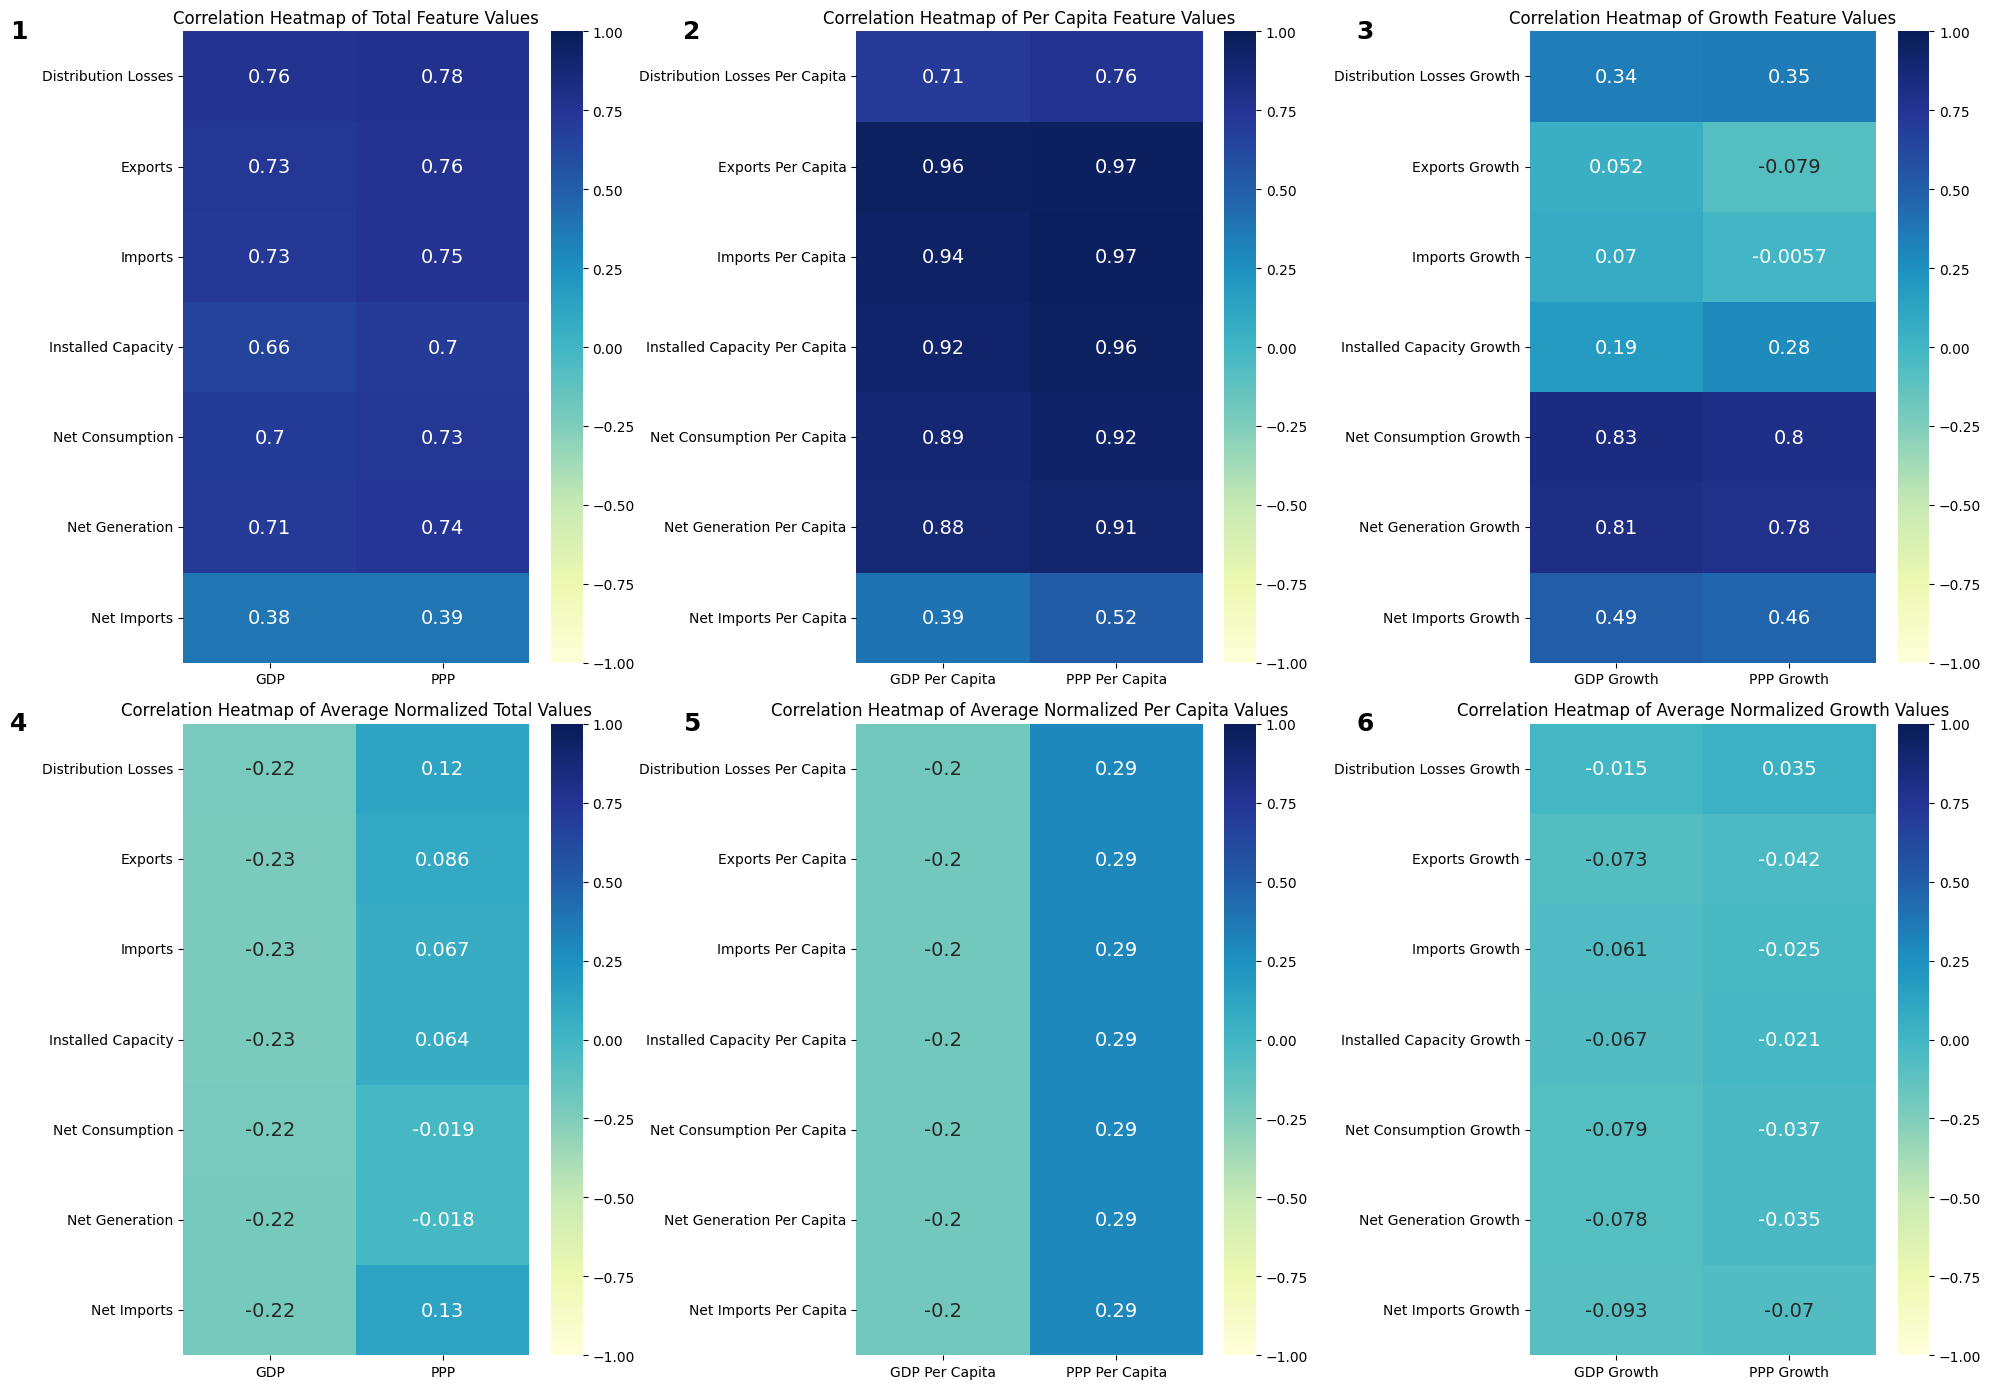

<Figure size 640x480 with 0 Axes>

In [173]:
# 2. Heatmap Analysis
# 2.1 Calculate the total values for each feature across all countries
# Sum the values for each feature independently
total_values = data_cleaned.groupby(level=1).sum()

# Calculate the correlation matrix for total values
correlation_total = total_values.T.corr()

# 2.2 Normalize data for each country to ensure equal weight for all countries
normalized_data = data_cleaned.groupby(level=0).transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Calculate the average values for each feature across all countries after normalization
average_normalized_values = normalized_data.groupby(level=1).mean()

# Calculate the correlation matrix for average normalized values
correlation_average = average_normalized_values.T.corr()

# 2.3 Plot the heatmaps
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# Extract different types of features
total_features = [col for col in data_cleaned.index.levels[1] if not ('Per Capita' in col or 'Growth' in col)]
per_capita_features = [col for col in data_cleaned.index.levels[1] if 'Per Capita' in col]
growth_features = [col for col in data_cleaned.index.levels[1] if 'Growth' in col]

# Calculate correlation matrices for total, per capita, and growth features
total_corr = data_cleaned.loc[(slice(None), total_features), :].groupby(level=1).sum().T.corr()
per_capita_corr = data_cleaned.loc[(slice(None), per_capita_features), :].groupby(level=1).sum().T.corr()

gdp_values = data_cleaned.xs('Economics: GDP', level=1)
weights = gdp_values.div(gdp_values.sum(axis=0), axis=1)
growth_weighted_sum = data_cleaned.loc[(slice(None), growth_features), :].mul(weights, level=0).groupby(level=1).sum()
growth_corr = growth_weighted_sum.T.corr()

# Calculate correlation matrices for normalized average values
total_avg_corr = normalized_data.loc[(slice(None), total_features), :].groupby(level=1).mean().T.corr()
per_capita_avg_corr = normalized_data.loc[(slice(None), per_capita_features), :].groupby(level=1).mean().T.corr()
growth_avg_corr = normalized_data.loc[(slice(None), growth_features), :].groupby(level=1).mean().T.corr()

# Custom label function to remove prefixes
def custom_label(label):
    return label.replace('Electricity: ', '').replace('Economics: ', '')

# Plot specific parts of heatmaps
x_subset1 = ['Economics: GDP', 'Economics: PPP']
y_subset1 = ['Electricity: Distribution Losses', 'Electricity: Exports', 'Electricity: Imports', 'Electricity: Installed Capacity', 'Electricity: Net Consumption', 'Electricity: Net Generation', 'Electricity: Net Imports']
sns.heatmap(total_corr.loc[y_subset1, x_subset1].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[0, 0], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[0, 0].set_title('Correlation Heatmap of Total Feature Values')
axes[0, 0].text(-0.5, 1.02, f'{1}', transform=axes[0, 0].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

x_subset2 = ['Economics: GDP Per Capita', 'Economics: PPP Per Capita']
y_subset2 = ['Electricity: Distribution Losses Per Capita', 'Electricity: Exports Per Capita', 'Electricity: Imports Per Capita', 'Electricity: Installed Capacity Per Capita', 'Electricity: Net Consumption Per Capita', 'Electricity: Net Generation Per Capita', 'Electricity: Net Imports Per Capita']
sns.heatmap(per_capita_corr.loc[y_subset2, x_subset2].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[0, 1], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[0, 1].set_title('Correlation Heatmap of Per Capita Feature Values')
axes[0, 1].text(-0.5, 1.02, f'{2}', transform=axes[0, 1].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

x_subset3 = ['Economics: GDP Growth', 'Economics: PPP Growth']
y_subset3 = ['Electricity: Distribution Losses Growth', 'Electricity: Exports Growth', 'Electricity: Imports Growth', 'Electricity: Installed Capacity Growth', 'Electricity: Net Consumption Growth', 'Electricity: Net Generation Growth', 'Electricity: Net Imports Growth']
sns.heatmap(growth_corr.loc[y_subset3, x_subset3].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[0, 2], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[0, 2].set_title('Correlation Heatmap of Growth Feature Values')
axes[0, 2].text(-0.5, 1.02, f'{3}', transform=axes[0, 2].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

sns.heatmap(total_avg_corr.loc[y_subset1, x_subset1].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[1, 0], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[1, 0].set_title('Correlation Heatmap of Average Normalized Total Values')
axes[1, 0].text(-0.5, 1.02, f'{4}', transform=axes[1, 0].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

sns.heatmap(per_capita_avg_corr.loc[y_subset2, x_subset2].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[1, 1], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[1, 1].set_title('Correlation Heatmap of Average Normalized Per Capita Values')
axes[1, 1].text(-0.5, 1.02, f'{5}', transform=axes[1, 1].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

sns.heatmap(growth_avg_corr.loc[y_subset3, x_subset3].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[1, 2], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[1, 2].set_title('Correlation Heatmap of Average Normalized Growth Values')
axes[1, 2].text(-0.5, 1.02, f'{6}', transform=axes[1, 2].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #2c3e50; text-align: center;">Heatmap</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    Since my goal is to discuss the correlation between electricity data and economic data, I only retained the relevant parts of the heatmap. The first three figures show the correlation of total global values, while the latter three represent the mean of globally normalized data, preventing the dominance of major countries.
    
  <p style="color: #34495e; line-height: 1.6;">
    In subplot 1, 2, and 6, we can clearly see the strong positive correlation between economic data and electricity data, indicating that our initial hypothesis is supported by the data.

  <p style="color: #34495e; line-height: 1.6;">
    Comparing subplot 1 and 4, as well as subplot 2 and 5, the correlation weakens after normalization, and GDP even turns into a negative correlation. This suggests that while major global economies show a positive correlation between economic data and electricity, many countries do not follow this pattern.

  <p style="color: #34495e; line-height: 1.6;">
    Observing subplot 6, we find that most countries exhibit synchronous growth between economic growth and electricity data. However, the relatively low correlation for net imports growth indicates differences in strategies among countries, specifically regarding whether they choose to export or import electricity, but this does not affect electricity consumption itself.

  <p style="color: #34495e; line-height: 1.6;">
    In subplot 3, only direct data related to electricity usage, such as net consumption and net generation, shows a strong correlation with economic growth. In contrast, indirect data or non-primary data such as imports and exports growth, distribution losses, and installed capacity show weaker correlations. These indirect factors are likely influenced by other variables, and different results may emerge over a longer time frame.

  <p style="color: #34495e; line-height: 1.6;">
    Next, I will provide more details to discuss the correlation in subplots 3, 4, 5.
  </p>
  
</div>

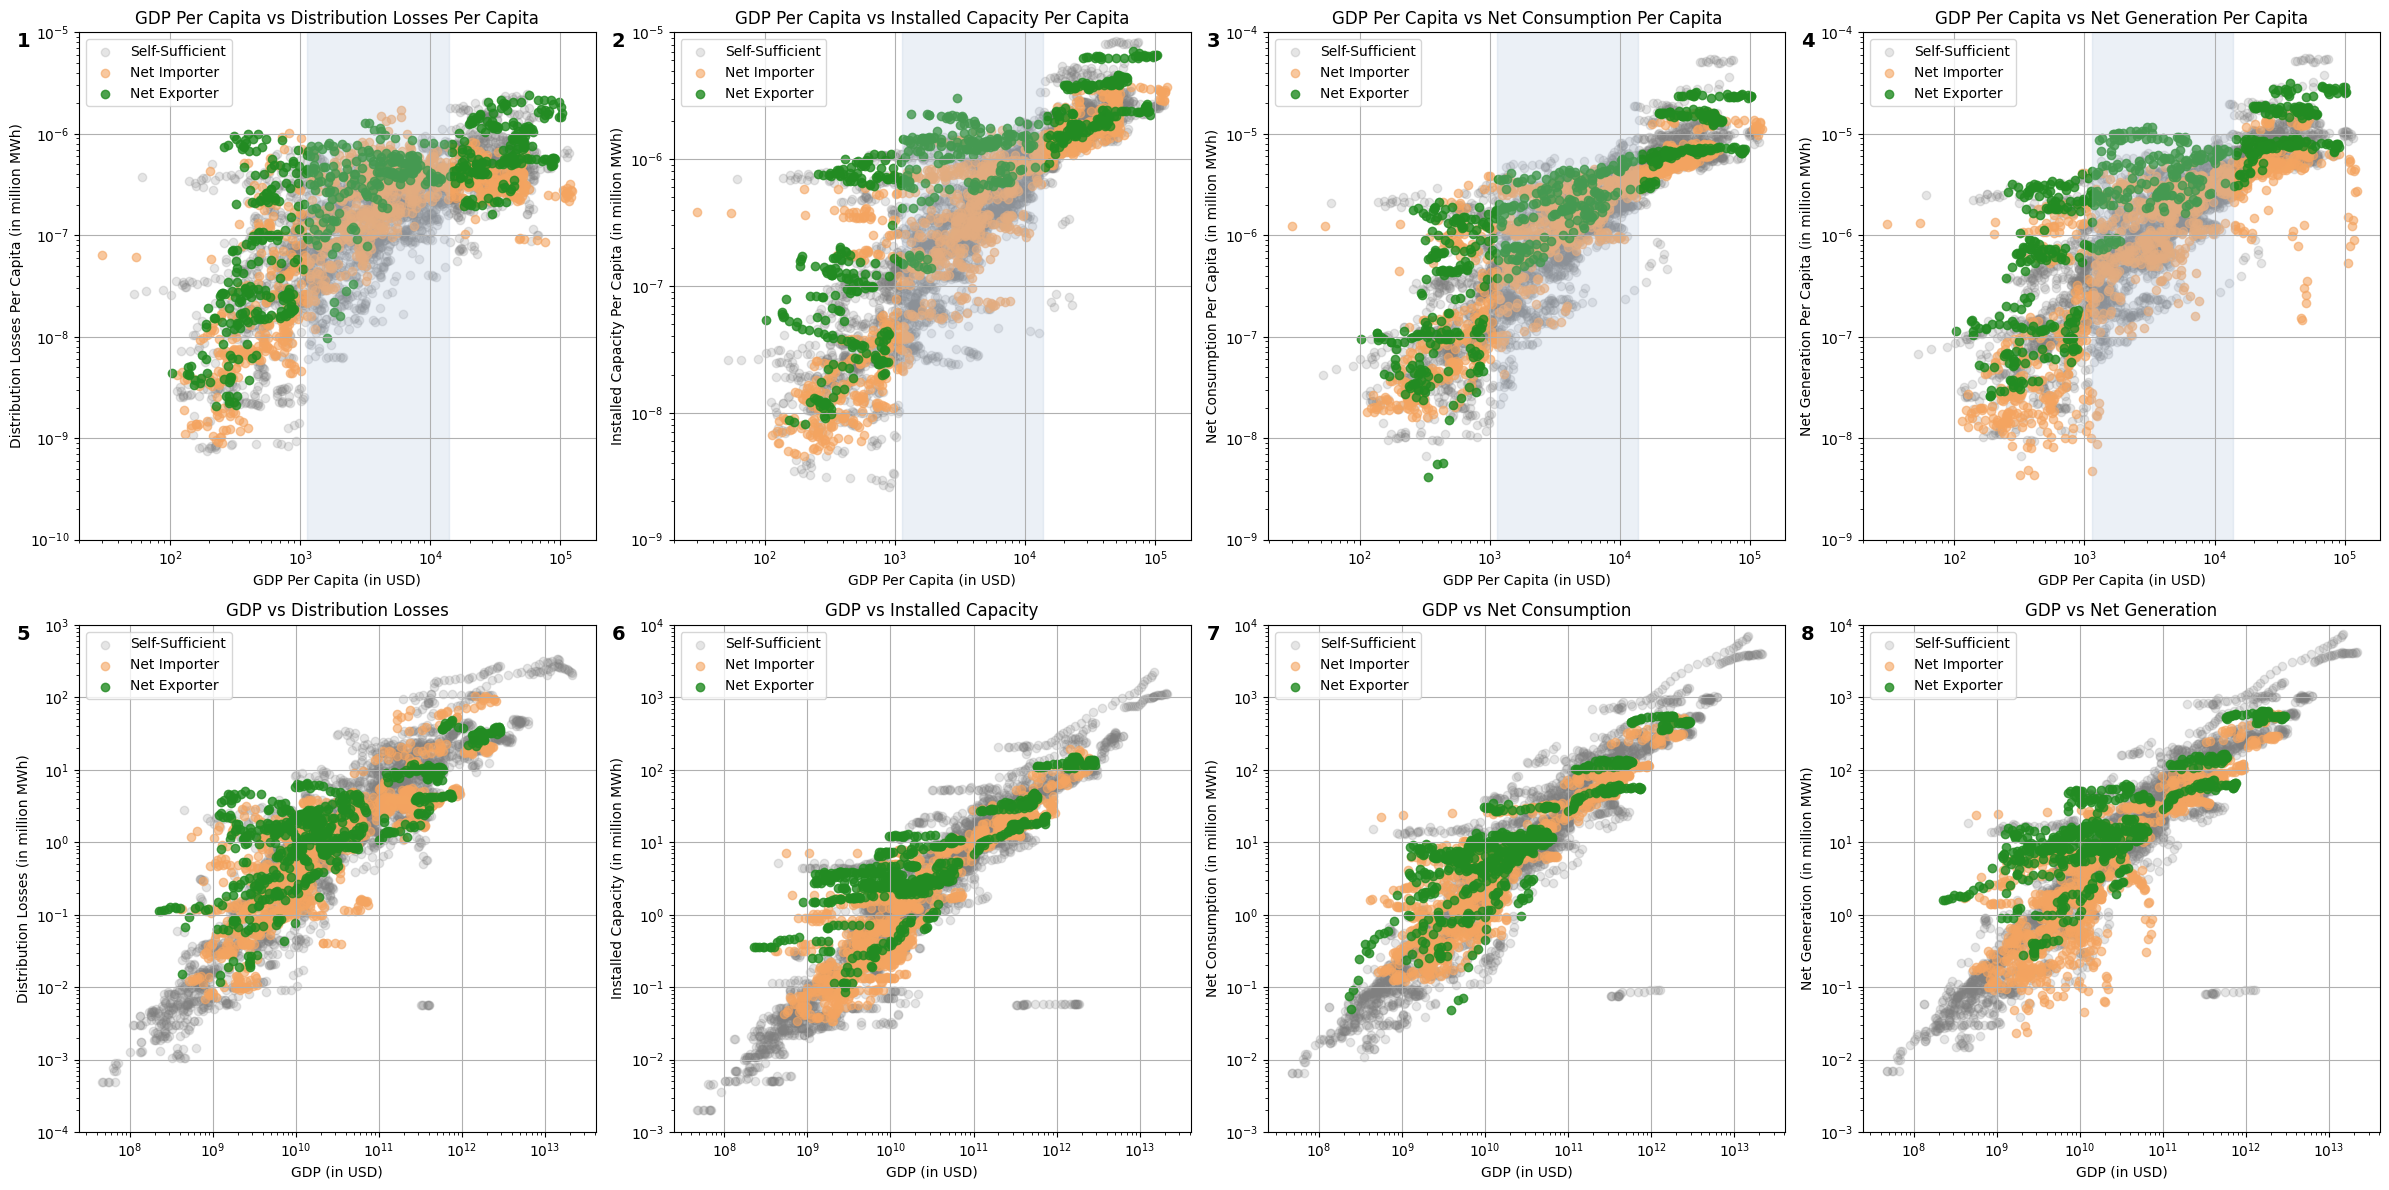

In [174]:
# 3. Scatter Plot Analysis
# 3.1 Calculate net import ratio
net_imports = data_cleaned.xs('Electricity: Net Imports', level=1)
net_consumption = data_cleaned.xs('Electricity: Net Consumption', level=1).replace(0, np.nan)  # Avoid division by zero
net_import_ratio = net_imports.div(net_consumption)

# Classify energy status based on net import ratio, 5% threshold
net_import_ratio_threshold = 0.05
def classify_energy_status(country_data):
    avg_ratio = country_data.mean()
    if avg_ratio > -net_import_ratio_threshold and avg_ratio < net_import_ratio_threshold:
        return 'Energy Self-Sufficient'
    elif avg_ratio > net_import_ratio_threshold:
        return 'Net Energy Importer'
    elif avg_ratio < -net_import_ratio_threshold:
        return 'Net Energy Exporter'
    else:
        return 'Undefined'

# Apply classification to each country
energy_status = net_import_ratio.groupby(level=0).apply(lambda x: classify_energy_status(x.mean()))

# Split data into three groups
self_sufficient_countries = energy_status[energy_status == 'Energy Self-Sufficient'].index
importer_countries = energy_status[energy_status == 'Net Energy Importer'].index
exporter_countries = energy_status[energy_status == 'Net Energy Exporter'].index

data_self_sufficient = data_cleaned.loc[self_sufficient_countries]
data_importers = data_cleaned.loc[importer_countries]
data_exporters = data_cleaned.loc[exporter_countries]

# 3.2 Plot
# Define y-axis limits for each feature
y_limits = {
    'Electricity: Distribution Losses Per Capita': (1e-10, 1e-5),
    'Electricity: Installed Capacity Per Capita': (1e-9, 1e-5),
    'Electricity: Net Consumption Per Capita': (1e-9, 1e-4),
    'Electricity: Net Generation Per Capita': (1e-9, 1e-4),
}

y_limits_2 = {
    'Electricity: Distribution Losses': (1e-4, 1e3),
    'Electricity: Installed Capacity': (1e-3, 1e4),
    'Electricity: Net Consumption': (1e-3, 1e4),
    'Electricity: Net Generation': (1e-3, 1e4),
}

electricity_features = ['Electricity: Distribution Losses Per Capita',  
                        'Electricity: Installed Capacity Per Capita', 
                        'Electricity: Net Consumption Per Capita', 
                        'Electricity: Net Generation Per Capita']

electricity_features_2 = ['Electricity: Distribution Losses',  
                        'Electricity: Installed Capacity', 
                        'Electricity: Net Consumption', 
                        'Electricity: Net Generation']

def plot_scatter(ax, x_feature, y_feature, title, y_lim=None):
    if not data_self_sufficient.empty:
        ax.scatter(data_self_sufficient.xs(x_feature, level=1), 
                   data_self_sufficient.xs(y_feature, level=1), 
                   color='grey', label='Self-Sufficient', alpha=0.2)
    if not data_importers.empty:
        ax.scatter(data_importers.xs(x_feature, level=1), 
                   data_importers.xs(y_feature, level=1), 
                   color='sandybrown', label='Net Importer', alpha=0.6)
    if not data_exporters.empty:
        ax.scatter(data_exporters.xs(x_feature, level=1), 
                   data_exporters.xs(y_feature, level=1), 
                   color='forestgreen', label='Net Exporter', alpha=0.8)
    ax.set_xlabel(x_feature.replace('Economics: ', '') + ' (in USD)')
    ax.set_ylabel(y_feature.replace('Electricity: ', '') + ' (in million MWh)')
    ax.set_xscale('log')  # Set x-axis to log scale
    ax.set_yscale('log')  # Set y-axis to log scale
    if y_lim:
        ax.set_ylim(y_lim)  # Set y-axis limits
    ax.set_title(title)
    if ax.get_legend_handles_labels()[1]:  # Only add legend if there are labels
        ax.legend()
    ax.grid(True)

def add_transparent_overlay(ax, x_range, y_range, alpha=0.25):
    ax.fill_between(x_range, y_range[0], y_range[1], color='lightsteelblue', alpha=alpha)

fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()

# Plot scatter and contour maps for GDP Per Capita and PPP Per Capita
for i, feature in enumerate(electricity_features):
    plot_scatter(axes[i], 'Economics: GDP Per Capita', feature, f'GDP Per Capita vs {feature.replace('Electricity: ', '')}', y_lim=y_limits.get(feature))
    # Add transparent overlay to subplots 1-4
    add_transparent_overlay(axes[i], x_range=(1136, 13845), y_range=y_limits.get(feature)) # middle income countries
    # Add subplot label with numeric index
    axes[i].text(-0.12, 1, f'{i + 1}', transform=axes[i].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')

for i, feature in enumerate(electricity_features_2):
    plot_scatter(axes[i + 4], 'Economics: GDP', feature, f'GDP vs {feature.replace('Electricity: ', '')}', y_lim=y_limits_2.get(feature))
    # Add subplot label with numeric index
    axes[i + 4].text(-0.12, 1, f'{i + 5}', transform=axes[i + 4].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')

# Hide any unused subplots
for j in range(len(electricity_features)+len(electricity_features_2), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #2c3e50; text-align: center;">Scattermap</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    Since PPP and GDP data are highly correlated, only GDP data is shown here. Countries are classified into three categories based on whether their net electricity import or export rate exceeds 5%: self-sufficient, net importer, and net exporter. Additionally, countries are divided by GDP into low income (below $1,136), middle income ($1,136 to $13,845), and high income (above $13,845). The light blue shaded areas in subplots 1 to 4 represent the middle income range.

  <p style="color: #34495e; line-height: 1.6;">
    Firstly, we can easily observe similarities across these countries. Consistent with the heatmap analysis, most countries exhibit a strong positive correlation between economic data and electricity data, suggesting that economic growth is closely linked with electricity generation and consumption. However, in subplots 5 to 8, we see some outliers in the bottom right. This implies that a few countries have significantly lower electricity generation and consumption compared to their economic scale. When examining the per capita data for these countries, these outliers disappear, indicating that their population size—either very large or very small—causes the per capita figures to regress to the mean.
    
  <p style="color: #34495e; line-height: 1.6;">
    The gray points represent self-sufficient countries, which account for more than half of the total and are evenly distributed. This indicates that most countries tend towards energy self-sufficiency regardless of their economic scale or development level.

  <p style="color: #34495e; line-height: 1.6;">
    The green points represent net exporters, mostly concentrated in lower to middle-income countries with relatively low economic scales. If we look at net consumption and net generation data, these countries’ electricity consumption is similar to that of other countries with comparable GDP, but their electricity generation is significantly higher, especially on a per capita basis. This suggests that these countries rely heavily on electricity exports as part of their economic structure. However, exporting more electricity does not appear to significantly improve their overall economic prosperity.

  <p style="color: #34495e; line-height: 1.6;">
    The orange points represent net importers, which are distributed quite unevenly. This suggests that the reasons for importing electricity are not strongly tied to economic conditions, though it is notable that countries with extremely large or small economic scales do not import electricity. I speculate that very small economies, such as some Pacific island nations, lack the infrastructure for electricity trade. Meanwhile, large economies, likely due to their high demand and national security considerations, are not inclined to rely on electricity imports.
    
  </p>
  
</div>

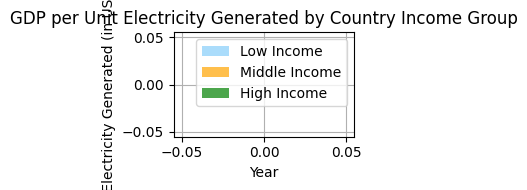

In [175]:
# 4. Histogram Plot Analysis
# 4.1 Group countries by GDP per capita
low_income_countries = data_cleaned.xs('Economics: GDP Per Capita', level=1) <= 1136
middle_income_countries = (data_cleaned.xs('Economics: GDP Per Capita', level=1) > 1136) & (data_cleaned.xs('Economics: GDP Per Capita', level=1) <= 13845)
high_income_countries = data_cleaned.xs('Economics: GDP Per Capita', level=1) > 13845

data_low_income = data_cleaned[low_income_countries]
data_middle_income = data_cleaned[middle_income_countries]
data_high_income = data_cleaned[high_income_countries]

# 4.2 Calculate GDP per unit electricity generated for each year
# Handle missing values by dropping NA values
gdp_per_unit_electricity_low = data_low_income.xs('Economics: GDP', level=1).div(data_low_income.xs('Electricity: Net Generation', level=1)).dropna()
gdp_per_unit_electricity_middle = data_middle_income.xs('Economics: GDP', level=1).div(data_middle_income.xs('Electricity: Net Generation', level=1)).dropna()
gdp_per_unit_electricity_high = data_high_income.xs('Economics: GDP', level=1).div(data_high_income.xs('Electricity: Net Generation', level=1)).dropna()

# 4.3 Plot histogram
fig, ax = plt.subplots(figsize=(3, 2))

years = gdp_per_unit_electricity_low.columns.astype(float)
ax.bar(years - 0.2, gdp_per_unit_electricity_low.mean(), width=0.2, label='Low Income', alpha=0.7, color='lightskyblue')
ax.bar(years, gdp_per_unit_electricity_middle.mean(), width=0.2, label='Middle Income', alpha=0.7, color='orange')
ax.bar(years + 0.2, gdp_per_unit_electricity_high.mean(), width=0.2, label='High Income', alpha=0.7, color='green')

ax.set_xlabel('Year')
ax.set_ylabel('GDP per Unit Electricity Generated (in USD / million MWh)')
ax.set_title('GDP per Unit Electricity Generated by Country Income Group')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

In [176]:
net_import_ratio

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Albania,-0.316008,-0.034163,0.000992,0.035316,-0.064516,-0.061420,0.172273,0.102814,0.292271,0.496020,...,0.475745,0.319976,0.462895,0.233710,0.237833,0.476298,-0.142776,0.370151,0.341928,-0.073896
Algeria,-0.066690,-0.085405,-0.078246,-0.019069,-0.009030,-0.000065,0.002248,-0.003245,-0.003500,-0.002228,...,-0.001143,-0.001969,-0.003882,-0.000580,-0.004478,-0.005690,-0.001465,-0.002131,-0.000958,-0.001407
Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.071757,0.040841,0.023811,0.038771,0.058694,0.079452,0.116334,0.076956,0.016688,0.023317,...,0.064667,0.066249,0.079782,0.069670,0.074126,0.083138,0.076249,0.087028,0.038463,0.019710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013928,0.021713,0.011810,0.006750,0.008229,0.004038,0.008251,0.005866,0.006972,0.006648
Western Sahara,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [177]:
# # 手动标准化国家名称
# def standardize_country_names(country_name):
#     # 手动替换不匹配的国家名称为标准名称
#     manual_mapping = {
#         'Russia': 'Russian Federation',
#         'South Korea': 'Korea, Republic of',
#         'Ivory Coast': "Côte d'Ivoire"
#     }
    
#     if country_name in manual_mapping:
#         return manual_mapping[country_name]
    
#     try:
#         return pycountry.countries.lookup(country_name).name
#     except LookupError:
#         return country_name  # 如果找不到匹配，保持原样

# # 标准化数据框中的国家名称
# net_import_ratio.index = net_import_ratio.index.map(standardize_country_names)

# 检查哪些国家未能匹配到标准化的国家名称
# unmatched_countries = []

# for country in net_import_ratio.index:
#     try:
#         # 检查国家是否能找到匹配的标准化名称
#         pycountry.countries.lookup(country)
#     except LookupError:
#         unmatched_countries.append(country)

# # 将未匹配的国家转换为数据框以便查看
# unmatched_countries_df = pd.DataFrame(unmatched_countries, columns=['Unmatched Country Name'])

# # 展示未匹配的国家
# print(unmatched_countries_df)

# Function to plot the net import ratio on the world map for each year
def plot_world_map(df):
    fig = go.Figure()

    years = df.columns  # Use the DataFrame columns as the years

    for year in years:
        # Filter the data for the current year
        filtered_df = df[year].dropna()  # Drop NaN values for the current year

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df.index,
            z=filtered_df.values,
            locationmode='country names',  # Correct locationmode value
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title='Net Import Ratio'),
            zmin=df.min().min()/100,  # Set minimum value of color range
            zmax=df.max().max()/100,  # Set maximum value of color range
            visible=False  # Set the trace to invisible initially
        )
        
        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i, year in enumerate(years):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'Net Import Ratio Map - {year}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(year)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text='Net Import Ratio Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth',
            showcountries=True  # 确保显示国家边界
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly_dark',  # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

# 调用函数绘制地图
plot_world_map(net_import_ratio)

In [178]:
pycountry.countries.lookup('Macao')

Country(alpha_2='MO', alpha_3='MAC', flag='🇲🇴', name='Macao', numeric='446', official_name='Macao Special Administrative Region of China')

为了进一步分析你提到的几点（2、3、4），并找出国家之间在电力和经济数据上的不同倾向特征，接下来你可以采取一些分组和绘图策略来深入探索这些差异。

### 1. **给国家分类的策略**
你需要将国家分类，以便识别哪些国家在电力与经济数据之间的相关性有不同的倾向。以下是一些可能的分类方式：

#### **1.1 基于经济发展水平**
- **按收入水平分类**：根据世界银行的标准，将国家分为 **低收入、中等收入、高收入** 国家。这种分类可以帮助你区分不同发展阶段的国家在电力和经济数据间的关系。
- **按人均 GDP**：进一步细分人均 GDP 水平，按四分位数将国家分为 **低、中低、中高、高** 四组。这样有助于更清楚地看到收入水平对电力使用和经济发展的影响。

#### **1.2 基于电力自给率**
- **能源自给率**：根据国家的 **电力进口和出口** 情况，可以将国家分为 **能源自给国、能源净进口国、能源净出口国**。这种分类可以帮助你观察进口或出口电力是否对经济数据的相关性有显著影响。

#### **1.3 基于经济增长和电力增长模式**
- **增长率类型分类**：基于 **GDP 增长率** 和 **电力增长率（如 Net Generation Growth）**，你可以将国家分为以下几类：
  - **经济和电力同步增长**：这类国家的 GDP 增长率和电力增长率都有强相关性。
  - **经济增长大于电力增长**：这类国家可能依赖其他产业或进口来满足能源需求。
  - **电力增长大于经济增长**：这类国家可能有能源过剩，或主要以能源出口为主。

### 2. **数据绘图建议**
为了分析上述三点，你可以选择合适的绘图方式，直观地展示不同国家组别之间的差异：

#### **2.1 分组后绘制散点图**
- **目的**：观察每个分类组内的电力与经济数据之间的关系。
- **操作**：
  - **按收入水平绘制散点图**：将国家按收入组分组，绘制 **GDP（或 PPP） 与 Net Generation** 的散点图，观察不同组别间是否存在显著差异。
  - **电力自给率组别**：将国家按能源自给、净进口、净出口分组，绘制 **Net Imports Growth 与 GDP Growth** 的散点图，观察电力进口与经济增长的关系。

#### **2.2 绘制盒须图（Box Plot）**
- **目的**：查看不同国家组别在电力或经济数据上的分布和中位数差异。
- **操作**：
  - 例如，按 **收入组** 绘制 **Net Generation Growth** 或 **GDP Growth** 的盒须图，观察不同收入水平的国家在这些变量上的差异。这样可以更直观地看到数据的分布特征和中位数，便于了解不同组别的倾向。

#### **2.3 线性回归分析与残差图**
- **目的**：分析某些特征之间的线性关系是否适用于所有国家组别，并寻找异常国家。
- **操作**：
  - **线性回归拟合**：对不同收入组分别进行 **Net Generation Growth vs. GDP Growth** 的线性拟合，查看回归线的斜率和相关性系数。
  - **残差图（Residual Plot）**：绘制残差图，查看模型拟合中存在异常的数据点，可能有助于识别某些国家与整体趋势的偏差原因。

#### **2.4 热力图对比分析**
- **目的**：对比不同分类下的特征相关性，看看某些组别是否存在显著差异。
- **操作**：
  - 在将国家分组后，为每个组计算经济与电力特征之间的相关性，并绘制 **热力图** 进行对比。这样可以帮助你直观地看到不同组别在这些特征间的相似性和差异。

### 3. **推荐的具体绘图顺序**
1. **散点图**：首先按收入水平或电力自给率对国家分组，绘制散点图来观察组间的特征关系是否有显著差异，特别是对比电力增长和经济增长之间的关系。
2. **盒须图**：针对不同组别，使用盒须图查看增长率或主要经济特征的分布，以找出组别内的特征一致性和异常值。
3. **线性回归与残差图**：在确定有显著差异后，进一步进行线性回归和残差分析，以量化不同组之间的差异程度。
4. **热力图对比**：最后对不同组别的特征之间的相关性进行对比分析，绘制热力图，确认各组别的经济和电力特征在相关性上的异同。

通过以上分类和绘图分析，你可以更深入地了解各国之间在经济和电力增长方面的差异，从而找出哪些因素影响不同国家在电力与经济特征之间的关系。这些分析也可以帮助你验证之前得出的结论是否适用于特定国家组别。